# 06 Softmax Classification

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [ ]:
z = torch.FloatTensor([1, 2, 3])

hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [ ]:
hypothesis.sum() #sum, max, min

tensor(1.)

In [ ]:
z = torch.rand(3, 5, requires_grad=True)
hypothesis = F.softmax(z, dim=1)
hypothesis2 = F.softmax(z, dim=0)
print(z)
print(hypothesis)
print(hypothesis2)

tensor([[0.3556, 0.4452, 0.0193, 0.2616, 0.7713],
        [0.3785, 0.9980, 0.9008, 0.4766, 0.1663],
        [0.8045, 0.6552, 0.1768, 0.8248, 0.8036]], requires_grad=True)
tensor([[0.1911, 0.2090, 0.1365, 0.1739, 0.2895],
        [0.1549, 0.2878, 0.2611, 0.1709, 0.1253],
        [0.2265, 0.1951, 0.1209, 0.2312, 0.2263]], grad_fn=<SoftmaxBackward0>)
tensor([[0.2786, 0.2518, 0.2181, 0.2502, 0.3878],
        [0.2850, 0.4376, 0.5266, 0.3103, 0.2117],
        [0.4364, 0.3106, 0.2553, 0.4395, 0.4005]], grad_fn=<SoftmaxBackward0>)


In [ ]:
y = torch.randint(5, (3,)).long()
print(y)

tensor([3, 0, 4])


In [ ]:
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1) # scatter_ : 반영 / (dim, 하나씩, 채울거)

tensor([[0., 0., 0., 1., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.]])

In [ ]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean() # .sum 전까지 (3,5)matrix / (sum->) (3,)matrix / (mean->) scalar 
cost2 = (y_one_hot * -torch.log(hypothesis)).sum(dim=1)
cost3 = (y_one_hot * -torch.log(hypothesis))
print(cost)
print(cost2)
print(cost3)

tensor(1.7000, grad_fn=<MeanBackward0>)
tensor([1.7491, 1.8650, 1.4859], grad_fn=<SumBackward1>)
tensor([[0.0000, 0.0000, 0.0000, 1.7491, 0.0000],
        [1.8650, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 1.4859]], grad_fn=<MulBackward0>)


In [ ]:
# pytorch 기능
torch.log(F.softmax(z, dim=1))

tensor([[-1.6551, -1.5656, -1.9915, -1.7491, -1.2394],
        [-1.8650, -1.2454, -1.3427, -1.7669, -2.0772],
        [-1.4849, -1.6342, -2.1126, -1.4646, -1.4859]], grad_fn=<LogBackward0>)

In [ ]:
F.log_softmax(z,dim=1)

tensor([[-1.6551, -1.5656, -1.9915, -1.7491, -1.2394],
        [-1.8650, -1.2454, -1.3427, -1.7669, -2.0772],
        [-1.4849, -1.6342, -2.1126, -1.4646, -1.4859]],
       grad_fn=<LogSoftmaxBackward0>)

In [ ]:
# Low level
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.7000, grad_fn=<MeanBackward0>)

In [ ]:
# High level
F.nll_loss(F.log_softmax(z, dim=1), y) # Negative Log Likelihood

tensor(1.7000, grad_fn=<NllLossBackward0>)

In [ ]:
F.cross_entropy(z,y)

tensor(1.7000, grad_fn=<NllLossBackward0>)

In [ ]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [ ]:
print(x_train)
print(y_train)

tensor([[1., 2., 1., 1.],
        [2., 1., 3., 2.],
        [3., 1., 3., 4.],
        [4., 1., 5., 5.],
        [1., 7., 5., 5.],
        [1., 2., 5., 6.],
        [1., 6., 6., 6.],
        [1., 7., 7., 7.]])
tensor([2, 2, 2, 1, 1, 1, 0, 0])


In [ ]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산 (1)
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) # or .mm or @
    y_one_hot = torch.zeros_like(hypothesis)
    y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
    cost = (y_one_hot * -torch.log(F.softmax(hypothesis, dim=1))).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.901535
Epoch  200/1000 Cost: 0.839114
Epoch  300/1000 Cost: 0.807826
Epoch  400/1000 Cost: 0.788472
Epoch  500/1000 Cost: 0.774822
Epoch  600/1000 Cost: 0.764449
Epoch  700/1000 Cost: 0.756191
Epoch  800/1000 Cost: 0.749398
Epoch  900/1000 Cost: 0.743671
Epoch 1000/1000 Cost: 0.738749


In [ ]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산 (2)
    z = x_train.matmul(W) + b # or .mm or @
    cost = F.cross_entropy(z, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568256
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


In [ ]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3) # Output이 3!

    def forward(self, x):
        return self.linear(x)

In [ ]:
model = SoftmaxClassifierModel()

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1) #linear

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 2.839122
Epoch  100/1000 Cost: 0.711753
Epoch  200/1000 Cost: 0.628132
Epoch  300/1000 Cost: 0.571281
Epoch  400/1000 Cost: 0.521554
Epoch  500/1000 Cost: 0.474550
Epoch  600/1000 Cost: 0.428675
Epoch  700/1000 Cost: 0.383189
Epoch  800/1000 Cost: 0.337776
Epoch  900/1000 Cost: 0.292793
Epoch 1000/1000 Cost: 0.252338


In [ ]:
# 이진인 경우 : BCE(Binary Cross Entropy), Sigmoid
# 아닌 경우 : CE(Cross Entropy), Softmax

# 07 Tips

Maximum Likelihood Estimation (MLE)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [2]:
x_train = torch.FloatTensor([[1, 2, 1], # x_train (m,3)
                             [1, 3, 2],
                             [1, 3, 4],
                             [1, 5, 5],
                             [1, 7, 5],
                             [1, 2, 5],
                             [1, 6, 6],
                             [1, 7, 7]
                            ])
y_train = torch.LongTensor([2, 2, 2, 1, 1, 1, 0, 0]) # y_train (m,)

In [3]:
x_test = torch.FloatTensor([[2, 1, 1], [3, 1, 2], [3, 3, 4]])
y_test = torch.LongTensor([2, 2, 2])

In [4]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 3) # 3개를 받아서 3개를 원디렉터에 전달
    def forward(self, x):
        return self.linear(x)

In [5]:
model = SoftmaxClassifierModel()

In [6]:
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [7]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.cross_entropy(prediction, y_train)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

In [8]:
def test(model, optimizer, x_test, y_test):
    prediction = model(x_test)
    predicted_classes = prediction.max(1)[1]
    correct_count = (predicted_classes == y_test).sum().item()
    cost = F.cross_entropy(prediction, y_test)

    print('Accuracy: {}% Cost: {:.6f}'.format(
         correct_count / len(y_test) * 100, cost.item()
    ))

In [9]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 2.203667
Epoch    1/20 Cost: 1.199645
Epoch    2/20 Cost: 1.142985
Epoch    3/20 Cost: 1.117769
Epoch    4/20 Cost: 1.100901
Epoch    5/20 Cost: 1.089523
Epoch    6/20 Cost: 1.079872
Epoch    7/20 Cost: 1.071320
Epoch    8/20 Cost: 1.063325
Epoch    9/20 Cost: 1.055720
Epoch   10/20 Cost: 1.048378
Epoch   11/20 Cost: 1.041245
Epoch   12/20 Cost: 1.034285
Epoch   13/20 Cost: 1.027478
Epoch   14/20 Cost: 1.020813
Epoch   15/20 Cost: 1.014279
Epoch   16/20 Cost: 1.007872
Epoch   17/20 Cost: 1.001586
Epoch   18/20 Cost: 0.995419
Epoch   19/20 Cost: 0.989365


In [10]:
test(model, optimizer, x_test, y_test)

Accuracy: 0.0% Cost: 1.425844


learning rate

In [11]:
model = SoftmaxClassifierModel()

In [12]:
optimizer = optim.SGD(model.parameters(), lr=1e5)

In [14]:
train(model, optimizer, x_train, y_train) #learning rate이 너무 작으면 cost가 거의 줄어들지 않는다.

Epoch    0/20 Cost: 200090.921875
Epoch    1/20 Cost: 1105673.875000
Epoch    2/20 Cost: 646816.375000
Epoch    3/20 Cost: 1064450.750000
Epoch    4/20 Cost: 1935385.250000
Epoch    5/20 Cost: 307693.093750
Epoch    6/20 Cost: 1494736.375000
Epoch    7/20 Cost: 668691.375000
Epoch    8/20 Cost: 661218.500000
Epoch    9/20 Cost: 541635.187500
Epoch   10/20 Cost: 1676443.125000
Epoch   11/20 Cost: 261552.140625
Epoch   12/20 Cost: 1099382.750000
Epoch   13/20 Cost: 818691.375000
Epoch   14/20 Cost: 1115072.625000
Epoch   15/20 Cost: 1478513.250000
Epoch   16/20 Cost: 738486.250000
Epoch   17/20 Cost: 827507.750000
Epoch   18/20 Cost: 643767.250000
Epoch   19/20 Cost: 135823.015625


In [15]:
model = SoftmaxClassifierModel()

In [16]:
optimizer = optim.SGD(model.parameters(), lr=1e-10)

In [17]:
train(model, optimizer, x_train, y_train) #적절한 숫자로 시작해 발산하면 작게, cost가 줄어들지 않으면 크게 조정하자.

Epoch    0/20 Cost: 3.187324
Epoch    1/20 Cost: 3.187324
Epoch    2/20 Cost: 3.187324
Epoch    3/20 Cost: 3.187324
Epoch    4/20 Cost: 3.187324
Epoch    5/20 Cost: 3.187324
Epoch    6/20 Cost: 3.187324
Epoch    7/20 Cost: 3.187324
Epoch    8/20 Cost: 3.187324
Epoch    9/20 Cost: 3.187324
Epoch   10/20 Cost: 3.187324
Epoch   11/20 Cost: 3.187324
Epoch   12/20 Cost: 3.187324
Epoch   13/20 Cost: 3.187324
Epoch   14/20 Cost: 3.187324
Epoch   15/20 Cost: 3.187324
Epoch   16/20 Cost: 3.187324
Epoch   17/20 Cost: 3.187324
Epoch   18/20 Cost: 3.187324
Epoch   19/20 Cost: 3.187324


In [18]:
model = SoftmaxClassifierModel()

In [21]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [22]:
train(model, optimizer, x_train, y_train)

Epoch    0/20 Cost: 0.954288
Epoch    1/20 Cost: 0.947007
Epoch    2/20 Cost: 0.939981
Epoch    3/20 Cost: 0.933198
Epoch    4/20 Cost: 0.926649
Epoch    5/20 Cost: 0.920322
Epoch    6/20 Cost: 0.914209
Epoch    7/20 Cost: 0.908298
Epoch    8/20 Cost: 0.902580
Epoch    9/20 Cost: 0.897047
Epoch   10/20 Cost: 0.891690
Epoch   11/20 Cost: 0.886500
Epoch   12/20 Cost: 0.881470
Epoch   13/20 Cost: 0.876592
Epoch   14/20 Cost: 0.871858
Epoch   15/20 Cost: 0.867262
Epoch   16/20 Cost: 0.862797
Epoch   17/20 Cost: 0.858458
Epoch   18/20 Cost: 0.854238
Epoch   19/20 Cost: 0.850131


In [23]:
test(model, optimizer, x_test, y_test)

Accuracy: 100.0% Cost: 0.202946


데이터 전처리

In [24]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [25]:
mu = x_train.mean(dim=0)

In [26]:
sigma = x_train.std(dim=0)

In [27]:
norm_x_train = (x_train - mu) / sigma

In [28]:
print(norm_x_train)

tensor([[-1.0674, -0.3758, -0.8398],
        [ 0.7418,  0.2778,  0.5863],
        [ 0.3799,  0.5229,  0.3486],
        [ 1.0132,  1.0948,  1.1409],
        [-1.0674, -1.5197, -1.2360]])


In [29]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [30]:
model = MultivariateLinearRegressionModel()

In [32]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [33]:
def train(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

In [34]:
train(model, optimizer, norm_x_train, y_train)

Epoch    0/20 Cost: 29785.089844
Epoch    1/20 Cost: 18906.166016
Epoch    2/20 Cost: 12054.673828
Epoch    3/20 Cost: 7702.029785
Epoch    4/20 Cost: 4925.733398
Epoch    5/20 Cost: 3151.632812
Epoch    6/20 Cost: 2016.996094
Epoch    7/20 Cost: 1291.051270
Epoch    8/20 Cost: 826.505249
Epoch    9/20 Cost: 529.207397
Epoch   10/20 Cost: 338.934174
Epoch   11/20 Cost: 217.153564
Epoch   12/20 Cost: 139.206757
Epoch   13/20 Cost: 89.313782
Epoch   14/20 Cost: 57.375465
Epoch   15/20 Cost: 36.928429
Epoch   16/20 Cost: 23.835773
Epoch   17/20 Cost: 15.450401
Epoch   18/20 Cost: 10.077809
Epoch   19/20 Cost: 6.633700


over fitting

In [35]:
def train_with_regularization(model, optimizer, x_train, y_train):
    nb_epochs = 20
    for epoch in range(nb_epochs):

        # H(x) 계산
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # l2 norm 계산
        l2_reg = 0
        for param in model.parameters():
            l2_reg += torch.norm(param)
            
        cost += l2_reg

        # cost로 H(x) 개선
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch+1, nb_epochs, cost.item()
        ))

In [36]:
model = MultivariateLinearRegressionModel()

In [37]:
optimizer = optim.SGD(model.parameters(), lr=1e-1)

In [38]:

train_with_regularization(model, optimizer, norm_x_train, y_train)

Epoch    1/20 Cost: 29477.810547
Epoch    2/20 Cost: 18798.513672
Epoch    3/20 Cost: 12059.365234
Epoch    4/20 Cost: 7773.400391
Epoch    5/20 Cost: 5038.264160
Epoch    6/20 Cost: 3290.066406
Epoch    7/20 Cost: 2171.881836
Epoch    8/20 Cost: 1456.433350
Epoch    9/20 Cost: 998.597473
Epoch   10/20 Cost: 705.594727
Epoch   11/20 Cost: 518.073608
Epoch   12/20 Cost: 398.057220
Epoch   13/20 Cost: 321.242920
Epoch   14/20 Cost: 272.078247
Epoch   15/20 Cost: 240.609131
Epoch   16/20 Cost: 220.465637
Epoch   17/20 Cost: 207.570572
Epoch   18/20 Cost: 199.314804
Epoch   19/20 Cost: 194.028214
Epoch   20/20 Cost: 190.642029


# 07-2 MNIST Instruction

In [39]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [40]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [41]:
training_epochs = 15
batch_size = 100

In [42]:
# pytorch / 0~1 / C H W
# image / 0~255 / H W C
# ToTensor() : image -> pytorch

mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [43]:
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [44]:
# MNIST data image of shape 28 * 28 = 784
linear = torch.nn.Linear(784, 10, bias=True).to(device) #clssifier가 분류

In [45]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [46]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577775
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404670
Epoch: 0005 cost = 0.307107031
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933408
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074089
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874764
Epoch: 0015 cost = 0.274422795
Learning finished


Accuracy: 0.8883000016212463
Label:  8
Prediction:  8


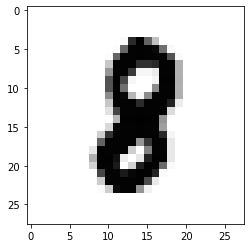

In [56]:
# Test the model using test sets
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()